--2022-02-17 14:05:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0s      

2022-02-17 14:05:04 (158 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]

Coefficients:  [[ 0.         50.07202982 -1.40583072]]
Intercept:  [106.82070067]
Mean absolute error: 22.80
Residual sum of squares (MSE): 855.65
R2-score: 0.78
Coefficients:  [[ 0.         23.67889083  5.80959604 -0.59356246]]
I

Text(0, 0.5, 'Emission')

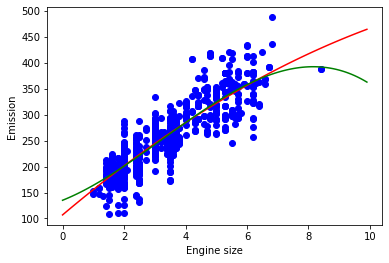

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

df = pd.read_csv("FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
#print(train_x)
train_x_poly = poly.fit_transform(train_x)
#train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

#plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
#XX = np.arange(0.0, 10.0, 0.1)
#print(XX)
#yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
#plt.plot(XX, yy, '-r' )
#plt.xlabel("Engine size")
#plt.ylabel("Emission")

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y_3 = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

test_x_poly3 = poly3.transform(test_x)
test_y_ = clf3.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
#print(XX)

#second degree curve
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )

#third degree curve
yy3 = clf3.intercept_[0]+ clf3.coef_[0][1]*XX+ clf3.coef_[0][2]*np.power(XX, 2)+ clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy3, '-g' )
plt.xlabel("Engine size")
plt.ylabel("Emission")





